# **Personal Loan Status Prediction using Ensembling Models**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('personal-loan.csv')

In [5]:
data = pd.DataFrame(data)
data.columns.tolist()

['customer_id',
 'age',
 'yrs_experience',
 'family_size',
 'education_level',
 'income',
 'mortgage_amt',
 'credit_card_acct',
 'credit_card_spend',
 'share_trading_acct',
 'fixed_deposit_acct',
 'online_acct',
 'personal_loan']

# COLUMN DETAILS
================
# customer_id – A unique identifier assigned to each customer.
# age – The age of the customer.
# yrs_experience – Number of years of work experience the customer has.
# family_size – The number of members in the customer's family.
# education_level – The highest level of education attained by the customer (e.g., High School, Graduate, Postgraduate).
# income – The annual income of the customer.
# mortgage_amt – The amount of mortgage or home loan taken by the customer.
# credit_card_acct – Whether the customer has a credit card account (Yes/No or 1/0).
# credit_card_spend – The total amount the customer spends using their credit card.
# share_trading_acct – Whether the customer has a stock/share trading account (Yes/No or 1/0).
# fixed_deposit_acct – Whether the customer has a fixed deposit account (Yes/No or 1/0).
# online_acct – Whether the customer has an online banking account (Yes/No or 1/0).
# personal_loan – Whether the customer has taken a personal loan (Yes/No or 1/0).

In [7]:
data.head()

,customer_id,age,yrs_experience,family_size,education_level,income,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct,personal_loan
0,3815,40.0,9.0,3.0,Graduate,60.0,0,yes,1.7,0,0,yes,no
1,5737,65.0,27.0,4.0,Advanced or Professional,36.0,90,no,0.0,0,0,yes,no
2,4209,61.0,3.0,2.0,Undergraduate,145.0,314,no,0.0,0,1,yes,yes
3,4734,29.0,14.0,1.0,Undergraduate,52.0,0,no,0.0,1,0,yes,no
4,2551,43.0,23.0,4.0,Graduate,33.0,0,no,0.0,0,0,yes,no


In [9]:
data.tail()

,customer_id,age,yrs_experience,family_size,education_level,income,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct,personal_loan
5995,5440,36.0,4.0,1.0,Undergraduate,72.0,0,no,0.0,0,0,yes,no
5996,1251,56.0,25.0,2.0,Undergraduate,110.0,0,no,0.0,0,0,no,no
5997,2454,34.0,11.0,2.0,Advanced or Professional,57.0,0,no,0.0,1,0,yes,no
5998,1435,30.0,NaN,2.0,Undergraduate,85.0,81,no,0.0,0,0,yes,no
5999,1409,47.0,22.0,3.0,Graduate,141.0,0,yes,2.1,0,0,no,no


## **Exploring the Data**

In [12]:
data.shape

(6000, 13)

In [14]:
data.columns

Index(['customer_id', 'age', 'yrs_experience', 'family_size',
       'education_level', 'income', 'mortgage_amt', 'credit_card_acct',
       'credit_card_spend', 'share_trading_acct', 'fixed_deposit_acct',
       'online_acct', 'personal_loan'],
      dtype='object')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         6000 non-null   int64  
 1   age                 5620 non-null   float64
 2   yrs_experience      5636 non-null   float64
 3   family_size         5615 non-null   float64
 4   education_level     6000 non-null   object 
 5   income              5623 non-null   float64
 6   mortgage_amt        6000 non-null   int64  
 7   credit_card_acct    6000 non-null   object 
 8   credit_card_spend   6000 non-null   float64
 9   share_trading_acct  6000 non-null   int64  
 10  fixed_deposit_acct  6000 non-null   int64  
 11  online_acct         6000 non-null   object 
 12  personal_loan       6000 non-null   object 
dtypes: float64(5), int64(4), object(4)
memory usage: 609.5+ KB


In [18]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,6000.0,3027.886667,1723.488432,3.0,1553.75,3045.5,4511.0,6000.0
age,5620.0,45.556940,13.373778,23.0,34.00,45.0,56.0,92.0
yrs_experience,5636.0,21.182221,13.247945,0.0,10.00,21.0,32.0,65.0
family_size,5615.0,2.468566,1.215636,1.0,1.00,2.0,4.0,7.0
income,5623.0,88.143873,48.736053,8.0,52.00,82.0,118.0,300.0
mortgage_amt,6000.0,67.585667,88.155099,0.0,0.00,0.0,125.0,617.0
credit_card_spend,6000.0,0.627467,1.423450,0.0,0.00,0.0,0.4,9.5
share_trading_acct,6000.0,0.099167,0.298911,0.0,0.00,0.0,0.0,1.0
fixed_deposit_acct,6000.0,0.078167,0.268456,0.0,0.00,0.0,0.0,1.0


In [20]:
categorical_cols = data.select_dtypes(include=['object']).columns

# Printing unique values for each categorical column
for col in categorical_cols:
    print(f"Unique values in '{col}': {data[col].unique()}")

Unique values in 'education_level': ['Graduate' 'Advanced or Professional' 'Undergraduate']
Unique values in 'credit_card_acct': ['yes' 'no']
Unique values in 'online_acct': ['yes' 'no']
Unique values in 'personal_loan': ['no' 'yes']


Applicant with credit history as 1 are more eligible for loan than with credit history = 0 (378 vs 7)

In [23]:
usd_to_inr = 83  # 1 USD = 83 INR

# Convert dollars to rupees
data['income'] = data['income'] * usd_to_inr
data['mortgage_amt'] = data['mortgage_amt'] * usd_to_inr
data['credit_card_spend'] = data['credit_card_spend'] * usd_to_inr

##  **Data Visualization**
#### **Exploring Some of the Variable by visualizing them.**

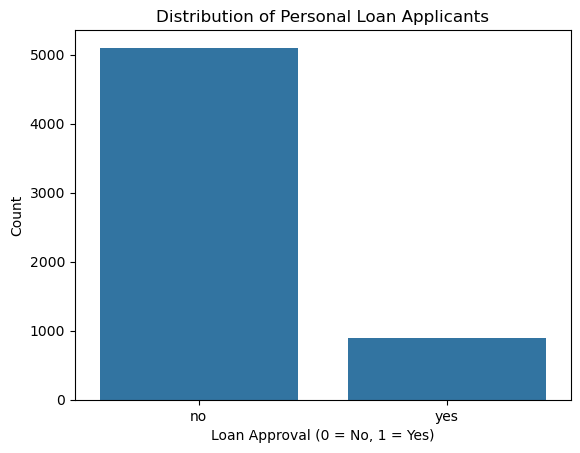

In [26]:
sns.countplot(x='personal_loan', data=data)
plt.title("Distribution of Personal Loan Applicants")
plt.xlabel("Loan Approval (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

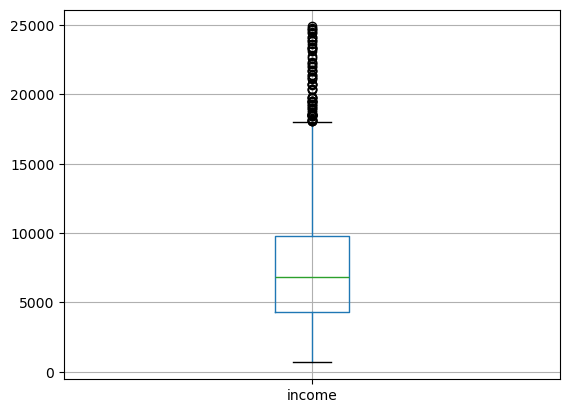

In [28]:
# Income using boxplot, Lots of Outliers
data.boxplot(column='income')
plt.show()

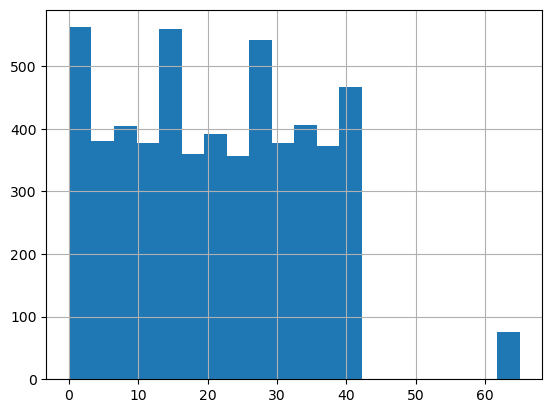

In [39]:
# yes_experience distribution.
data['yrs_experience'].hist(bins=20)
plt.show()

Uniform distribution with some peaks – The distribution appears relatively even, but some values (like around 5, 15, 25, and 35 years) have higher frequencies, suggesting that experience might be grouped around specific milestones.

Few outliers above 60 years – There is a bar at 60+ years, indicating a few individuals with exceptionally high experience.

No skewness, mostly symmetric 

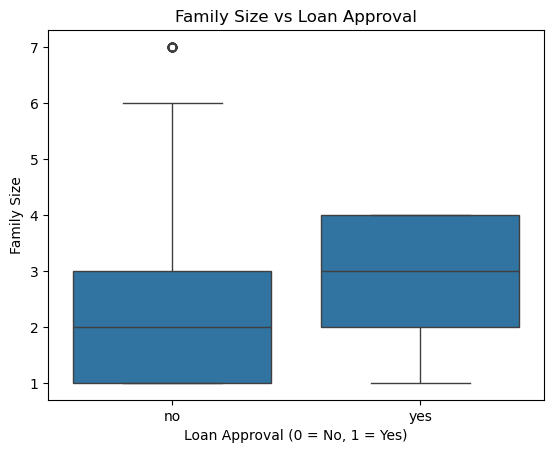

In [42]:
sns.boxplot(x='personal_loan', y='family_size', data=data)
plt.title("Family Size vs Loan Approval")
plt.xlabel("Loan Approval (0 = No, 1 = Yes)")
plt.ylabel("Family Size")
plt.show()

Larger families might have a higher approval rate.
    
Loan approvals could be influenced by financial stability (since larger families may have higher incomes).

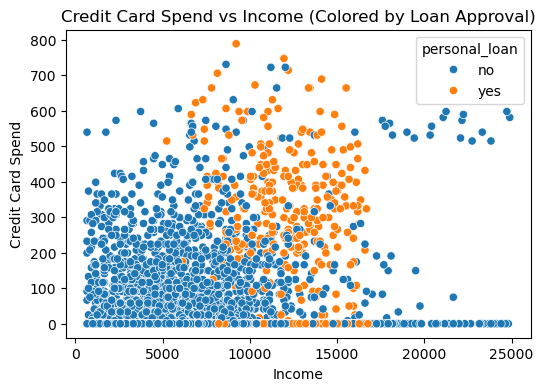

In [45]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='income', y='credit_card_spend', hue='personal_loan', data=data)
plt.title("Credit Card Spend vs Income (Colored by Loan Approval)")
plt.xlabel("Income")
plt.ylabel("Credit Card Spend")
plt.show()

the graph suggests a positive relationship between income and credit card spending, and indicates that higher income and spending are associated with a higher likelihood of loan approval. However, it's important to remember that correlation does not equal causation, and other factors likely play a role in loan approval decisions.

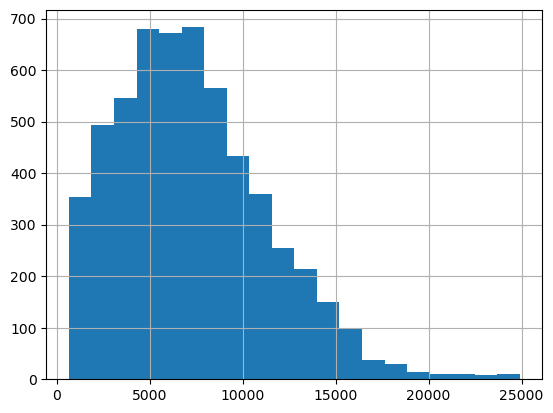

In [48]:
data['income'].hist(bins=20)
plt.show()
#Little Right Skewed.

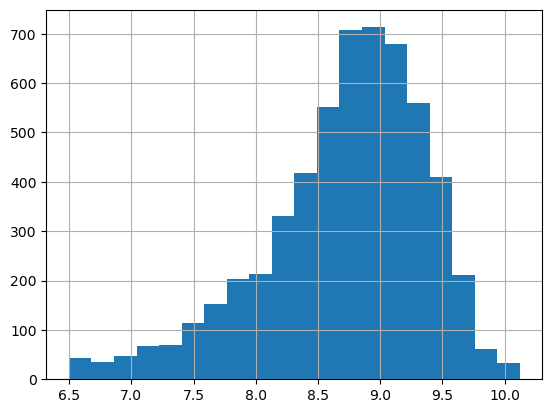

In [50]:
# Normalizing the right skewed data.

data['income_log'] = np.log(data['income'])

# Visualizing LoanAmount_Log
data['income_log'].hist(bins=20)
plt.show()

## **Looking for missing values**

In [53]:
data.isnull().sum()

customer_id             0
age                   380
yrs_experience        364
family_size           385
education_level         0
income                377
mortgage_amt            0
credit_card_acct        0
credit_card_spend       0
share_trading_acct      0
fixed_deposit_acct      0
online_acct             0
personal_loan           0
income_log            377
dtype: int64

##  **Handling missing values**

In [56]:
#Age
data['age'] = data['age'].fillna(data['age'].median())

In [58]:
#yrs_experience
data['yrs_experience'] = data['yrs_experience'].fillna(data['yrs_experience'].median())

In [60]:
#income
data[['income','income_log']] = data[['income','income_log']].fillna(data['income'].mean())

In [62]:
#mortgage_amt
data['mortgage_amt'] = data['mortgage_amt'].fillna(data['mortgage_amt'].median())

In [64]:
#family size
data['family_size'] = data['family_size'].fillna(data['family_size'].mean())

In [66]:
data.isnull().sum()

customer_id           0
age                   0
yrs_experience        0
family_size           0
education_level       0
income                0
mortgage_amt          0
credit_card_acct      0
credit_card_spend     0
share_trading_acct    0
fixed_deposit_acct    0
online_acct           0
personal_loan         0
income_log            0
dtype: int64

all missing values are handled

In [69]:
data.head()

,customer_id,age,yrs_experience,family_size,education_level,income,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct,personal_loan,income_log
0,3815,40.0,9.0,3.0,Graduate,4980.0,0,yes,141.1,0,0,yes,no,8.513185
1,5737,65.0,27.0,4.0,Advanced or Professional,2988.0,7470,no,0.0,0,0,yes,no,8.002360
2,4209,61.0,3.0,2.0,Undergraduate,12035.0,26062,no,0.0,0,1,yes,yes,9.395574
3,4734,29.0,14.0,1.0,Undergraduate,4316.0,0,no,0.0,1,0,yes,no,8.370084
4,2551,43.0,23.0,4.0,Graduate,2739.0,0,no,0.0,0,0,yes,no,7.915348


## **Handling Categorical Columns**

In [72]:
data.sample(5)

,customer_id,age,yrs_experience,family_size,education_level,income,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct,personal_loan,income_log
3997,3824,63.0,18.0,3.000000,Undergraduate,1660.00000,0,no,0.0,0,0,yes,no,7.414573
2996,4534,32.0,22.0,2.000000,Advanced or Professional,7470.00000,9628,no,0.0,1,0,yes,no,8.918650
2891,1571,25.0,36.0,1.000000,Undergraduate,6806.00000,19920,yes,141.1,0,0,yes,no,8.825560
1760,261,35.0,21.0,2.468566,Graduate,7315.94149,0,no,0.0,0,0,yes,no,7315.941490
2023,369,46.0,33.0,2.000000,Advanced or Professional,13446.00000,23821,no,0.0,0,0,yes,yes,9.506437


## **Encoding**

In [75]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Apply label encoding to each categorical column
data['education_level'] = le.fit_transform(data['education_level'])
data['online_acct'] = le.fit_transform(data['online_acct'])
data['personal_loan'] = le.fit_transform(data['personal_loan'])
data['credit_card_acct'] = le.fit_transform(data['credit_card_acct'])

In [77]:
data.head()

,customer_id,age,yrs_experience,family_size,education_level,income,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct,personal_loan,income_log
0,3815,40.0,9.0,3.0,1,4980.0,0,1,141.1,0,0,1,0,8.513185
1,5737,65.0,27.0,4.0,0,2988.0,7470,0,0.0,0,0,1,0,8.002360
2,4209,61.0,3.0,2.0,2,12035.0,26062,0,0.0,0,1,1,1,9.395574
3,4734,29.0,14.0,1.0,2,4316.0,0,0,0.0,1,0,1,0,8.370084
4,2551,43.0,23.0,4.0,1,2739.0,0,0,0.0,0,0,1,0,7.915348


## **Feature Scaling**

In [80]:
cols = ['income','mortgage_amt','credit_card_spend']
from sklearn.preprocessing import StandardScaler

scalar_per = StandardScaler()
data[cols] = scalar_per.fit_transform(data[cols])

In [82]:
data.head()

,customer_id,age,yrs_experience,family_size,education_level,income,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct,personal_loan,income_log
0,3815,40.0,9.0,3.0,1,-0.596573,-0.766732,1,0.753537,0,0,1,0,8.513185
1,5737,65.0,27.0,4.0,0,-1.105308,0.254281,0,-0.440844,0,0,1,0,8.002360
2,4209,61.0,3.0,2.0,2,1.205194,2.795469,0,-0.440844,0,1,1,1,9.395574
3,4734,29.0,14.0,1.0,2,-0.766151,-0.766732,0,-0.440844,1,0,1,0,8.370084
4,2551,43.0,23.0,4.0,1,-1.168899,-0.766732,0,-0.440844,0,0,1,0,7.915348


ML algorithm which don't need feature scaling are Non-linear algorithms. like Decision Tree, Random Forest, Gradient Bost, Naive Bayes, etc.

Any algorithm, which is not distance based is not affected by feature scaling.

## **Splitting The Dataset Into The Training Set And Test Set**

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [88]:
X = data.drop(['customer_id','income_log','personal_loan'], axis=1)
y = data['personal_loan']

In [90]:
X.head()

,age,yrs_experience,family_size,education_level,income,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct
0,40.0,9.0,3.0,1,-0.596573,-0.766732,1,0.753537,0,0,1
1,65.0,27.0,4.0,0,-1.105308,0.254281,0,-0.440844,0,0,1
2,61.0,3.0,2.0,2,1.205194,2.795469,0,-0.440844,0,1,1
3,29.0,14.0,1.0,2,-0.766151,-0.766732,0,-0.440844,1,0,1
4,43.0,23.0,4.0,1,-1.168899,-0.766732,0,-0.440844,0,0,1


In [92]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)


### **Applying SMOTE analysis for Balancing the Data**

In [95]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [97]:
print("Before SMOTE:", Counter(y_train))

Before SMOTE: Counter({0: 4094, 1: 706})


In [99]:
smote = SMOTE(sampling_strategy=1.0, random_state=42)  # 1.0 means fully balanced

# Apply SMOTE on training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("After SMOTE:", Counter(y_train_resampled))

After SMOTE: Counter({0: 4094, 1: 4094})


#### **Training multiple Ensembling models and selecting the one with the highest accuracy for real-world predictions.**

## **Random Forest Classifier**

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)
y_pred = rf_model.predict(X_test)  # assuming X_test is your test data
print("Accuracy:", accuracy_score(y_test, y_pred))  # assuming y_test is your test labels
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9266666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1006
           1       0.76      0.80      0.78       194

    accuracy                           0.93      1200
   macro avg       0.86      0.88      0.87      1200
weighted avg       0.93      0.93      0.93      1200



## **Gradient Boosting Classifier**

In [106]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_resampled, y_train_resampled)
y_pred = gb_model.predict(X_test)  # assuming X_test is your test data
print("Accuracy:", accuracy_score(y_test, y_pred))  # assuming y_test is your test labels
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9191666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1006
           1       0.72      0.82      0.77       194

    accuracy                           0.92      1200
   macro avg       0.84      0.88      0.86      1200
weighted avg       0.92      0.92      0.92      1200



## **XGBoost**

In [109]:
import xgboost as xgb

In [111]:
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42, eval_metric='mlogloss')
xgb_model.fit(X_train_resampled, y_train_resampled)
y_pred = xgb_model.predict(X_test)  # assuming X_test is your test data
print("Accuracy:", accuracy_score(y_test, y_pred))  # assuming y_test is your test labels
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9125
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1006
           1       0.74      0.72      0.73       194

    accuracy                           0.91      1200
   macro avg       0.84      0.83      0.84      1200
weighted avg       0.91      0.91      0.91      1200



RandomForest score for the model : 92.08

------------------------------------------------------
Gradient Boosting Classifier score for the model: 91.91
    
--------------------------------------------------------
XGBoost Score for the model:91.25

Selecting RandomForest model for Production with 92.08 accuracy. .

## **Save The Model**
**Before we save our best model Logistic Regression for Production, we've to train our Model on the entire dataset with best parameters that we've just found.**

In [116]:
final_model = rf_model.fit(X,y)

**Saving our model, so that we've don't have to train it again using joblib**.

In [119]:
import pickle

# saving our model by passing an instance of our model and giving it a name.

with open("personal_model.pkl", "wb") as file:
    pickle.dump(final_model, file)

In [123]:

# Ensure you're loading the correct file
with open("personal_model.pkl", "rb") as file:
    personal_model = pickle.load(file)

# Check if the model has the `.predict()` method
if not hasattr(personal_model, "predict"):
    raise TypeError("Loaded `home_model` is not a valid ML model.")


In [125]:
print("Type of personal_model:", type(personal_model))

# Check if it is an actual ML model and has `predict` method
if not hasattr(personal_model, "predict"):
    raise TypeError("Loaded `home_model` is not a valid ML model.")


Type of personal_model: <class 'sklearn.ensemble._forest.RandomForestClassifier'>


In [ ]:
X.columns

In [127]:
sample_data = pd.DataFrame({
    'age': [65.0],
    'yrs_experience': [27.0],
    'family_size': [4],
    'education_level': [0],
    'income': [2988.0],
    'mortgage_amt': [7470],
    'credit_card_acct': [0.0],
    'credit_card_spend':0,
    'share_trading_acct':0,
    'fixed_deposit_acct':0,
    'online_acct':1
},index=[0])

In [129]:
result = final_model.predict(sample_data)

In [131]:
if result==1:
    print("Loan Approved")
else:
    print("Loan Not Approved")

Loan Not Approved
